# Análise de Evasão de Clientes — Telecom X

## Introdução

Este notebook tem como objetivo analisar o problema de **evasão de clientes (churn)** da empresa **Telecom X**.

Nos últimos meses, a empresa identificou um aumento significativo no número de cancelamentos de planos por parte dos clientes. Preocupada com essa situação, a Telecom X contratou um analista de dados para investigar os motivos por trás dessas evasões.

A partir dos dados disponíveis, esta análise busca responder a perguntas como:

- Quais variáveis estão mais relacionadas com a evasão de clientes?
- Existem perfis ou padrões entre os clientes que cancelam os serviços?
- Como esses insights podem auxiliar a empresa na retenção de clientes?

Além de entender o comportamento dos clientes, o objetivo final é fornecer informações que possam embasar decisões estratégicas da empresa para reduzir a taxa de churn.


##Extração de dados (E) a partir de uma API disponibilizada para a empresa :

In [1]:
import pandas as pd

In [2]:
df = pd.read_json('https://raw.githubusercontent.com/ingridcristh/challenge2-data-science/refs/heads/main/TelecomX_Data.json')

In [3]:
df.head()

,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."


##**Limpeza e Tratamento de Dados:**

In [4]:
df_exp = pd.json_normalize(
    df.to_dict(orient='records'),
    sep='_'
)


In [5]:
df_exp.head()

,customerID,Churn,customer_gender,customer_SeniorCitizen,customer_Partner,customer_Dependents,customer_tenure,phone_PhoneService,phone_MultipleLines,internet_InternetService,...,internet_OnlineBackup,internet_DeviceProtection,internet_TechSupport,internet_StreamingTV,internet_StreamingMovies,account_Contract,account_PaperlessBilling,account_PaymentMethod,account_Charges_Monthly,account_Charges_Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


In [6]:
df_exp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerID                 7267 non-null   object 
 1   Churn                      7267 non-null   object 
 2   customer_gender            7267 non-null   object 
 3   customer_SeniorCitizen     7267 non-null   int64  
 4   customer_Partner           7267 non-null   object 
 5   customer_Dependents        7267 non-null   object 
 6   customer_tenure            7267 non-null   int64  
 7   phone_PhoneService         7267 non-null   object 
 8   phone_MultipleLines        7267 non-null   object 
 9   internet_InternetService   7267 non-null   object 
 10  internet_OnlineSecurity    7267 non-null   object 
 11  internet_OnlineBackup      7267 non-null   object 
 12  internet_DeviceProtection  7267 non-null   object 
 13  internet_TechSupport       7267 non-null   objec

In [7]:
df_exp['customer_SeniorCitizen'] =  df_exp['customer_SeniorCitizen'].astype(bool)

In [8]:
df_exp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerID                 7267 non-null   object 
 1   Churn                      7267 non-null   object 
 2   customer_gender            7267 non-null   object 
 3   customer_SeniorCitizen     7267 non-null   bool   
 4   customer_Partner           7267 non-null   object 
 5   customer_Dependents        7267 non-null   object 
 6   customer_tenure            7267 non-null   int64  
 7   phone_PhoneService         7267 non-null   object 
 8   phone_MultipleLines        7267 non-null   object 
 9   internet_InternetService   7267 non-null   object 
 10  internet_OnlineSecurity    7267 non-null   object 
 11  internet_OnlineBackup      7267 non-null   object 
 12  internet_DeviceProtection  7267 non-null   object 
 13  internet_TechSupport       7267 non-null   objec

In [9]:
df_exp.describe()

,customer_tenure,account_Charges_Monthly
count,7267.000000,7267.000000
mean,32.346498,64.720098
std,24.571773,30.129572
min,0.000000,18.250000
25%,9.000000,35.425000
50%,29.000000,70.300000
75%,55.000000,89.875000
max,72.000000,118.750000


In [10]:
df_exp['account_Charges_Total'] = (
    df_exp['account_Charges_Total']
    .astype(str)
    .str.strip()
    .replace('', '0')
    .astype(float)
)


In [11]:
df_exp = df_exp.astype({
    'account_Charges_Monthly': 'float',
    'account_Charges_Total': 'float',
    'customer_tenure': 'int',
})


In [12]:
df_exp['account_Charges_Total'].value_counts()

,count
account_Charges_Total,
20.20,11
0.00,11
19.75,9
19.55,9
19.90,9
...,...
1993.20,1
72.10,1
1237.85,1


In [13]:
df_exp['Contas_diarias'] = df_exp['account_Charges_Monthly'] / 30
df_exp['Contas_diarias'] = df_exp['Contas_diarias'].round(2)

In [14]:
df_exp['Contas_diarias']

,Contas_diarias
0,2.19
1,2.00
2,2.46
3,3.27
4,2.80
...,...
7262,1.84
7263,2.84
7264,1.68
7265,2.26


In [15]:
df_exp.describe()

,customer_tenure,account_Charges_Monthly,account_Charges_Total,Contas_diarias
count,7267.000000,7267.000000,7267.000000,7267.000000
mean,32.346498,64.720098,2277.182035,2.157292
std,24.571773,30.129572,2268.648587,1.004407
min,0.000000,18.250000,0.000000,0.610000
25%,9.000000,35.425000,396.200000,1.180000
50%,29.000000,70.300000,1389.200000,2.340000
75%,55.000000,89.875000,3778.525000,2.995000
max,72.000000,118.750000,8684.800000,3.960000


In [16]:
df_exp['Churn'].value_counts()

,count
Churn,
No,5174
Yes,1869
,224


**Análise Exploratória de Dados.** Utilizando bibliotecas como seaborn, matplotlib e numpy.

In [17]:
import matplotlib.pyplot as plt


In [18]:
df_exp['Churn'] = df_exp['Churn'].replace(r'^\s*$', pd.NA, regex=True)
df_exp = df_exp.dropna(subset=['Churn'])


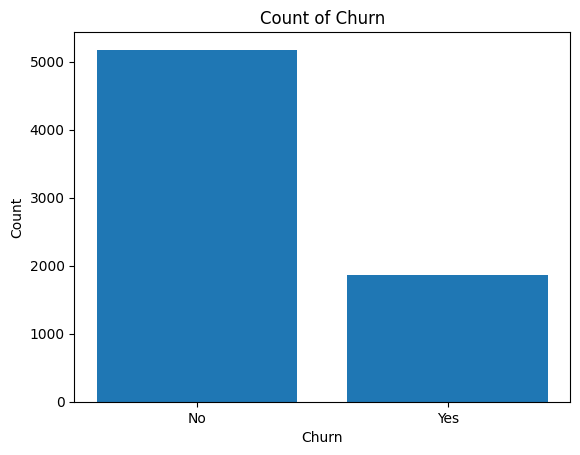

In [21]:
churn_counts = df_exp['Churn'].value_counts()

plt.bar(x=churn_counts.index, height=churn_counts.values)
plt.xlabel('Churn')
plt.ylabel('Count')
plt.title('Count of Churn')
plt.show()

In [22]:
import seaborn as sns

In [23]:
df_exp.head()

,customerID,Churn,customer_gender,customer_SeniorCitizen,customer_Partner,customer_Dependents,customer_tenure,phone_PhoneService,phone_MultipleLines,internet_InternetService,...,internet_DeviceProtection,internet_TechSupport,internet_StreamingTV,internet_StreamingMovies,account_Contract,account_PaperlessBilling,account_PaymentMethod,account_Charges_Monthly,account_Charges_Total,Contas_diarias
0,0002-ORFBO,No,Female,False,Yes,Yes,9,Yes,No,DSL,...,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.30,2.19
1,0003-MKNFE,No,Male,False,No,No,9,Yes,Yes,DSL,...,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.40,2.00
2,0004-TLHLJ,Yes,Male,False,No,No,4,Yes,No,Fiber optic,...,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85,2.46
3,0011-IGKFF,Yes,Male,True,Yes,No,13,Yes,No,Fiber optic,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85,3.27
4,0013-EXCHZ,Yes,Female,True,Yes,No,3,Yes,No,Fiber optic,...,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.40,2.80


In [24]:
pd.crosstab(df_exp['Churn'], df_exp['customer_gender'])

customer_gender,Female,Male
Churn,,
No,2549,2625
Yes,939,930


In [29]:
contingencia = pd.crosstab(df_exp['Churn'], df_exp['account_Contract'])
contingencia

account_Contract,Month-to-month,One year,Two year
Churn,,,
No,2220,1307,1647
Yes,1655,166,48


In [ ]:
teste = df_exp.groupby('Churn')['account_Charges_Total'].mean()
teste

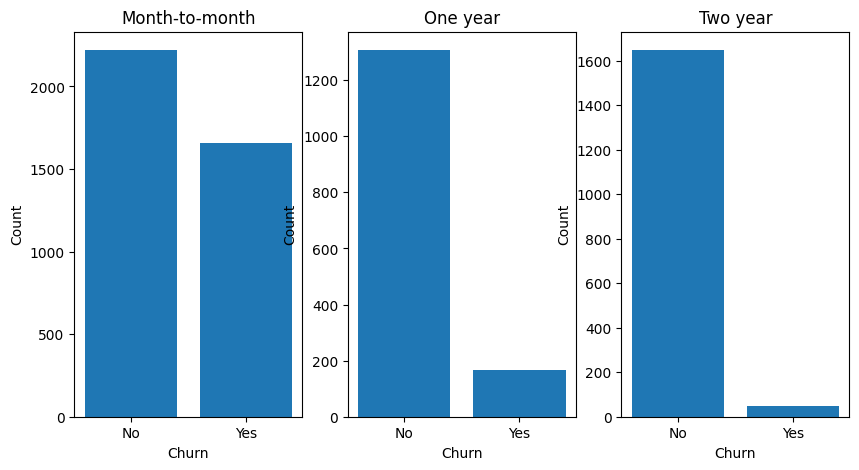

In [33]:
fig , ax = plt.subplots(1,3,figsize=(10,5))
ax[0].bar(x=contingencia.index, height=contingencia.values[:,0])
ax[1].bar(x=contingencia.index, height=contingencia.values[:,1])
ax[2].bar(x=contingencia.index, height=contingencia.values[:,2])
ax[0].set_xlabel('Churn')
ax[0].set_ylabel('Count')
ax[0].set_title('Month-to-month')
ax[1].set_xlabel('Churn')
ax[1].set_ylabel('Count')
ax[1].set_title('One year')
ax[2].set_xlabel('Churn')
ax[2].set_ylabel('Count')
ax[2].set_title('Two year')
plt.show()

In [42]:
fig , ax = plt.subplots(1,3,figsize=(10,5))
ax[0].bar(x=contingencia.index, height=contingencia.values[:,0])
ax[1].bar(x=contingencia.index, height=contingencia.values[:,1])
ax[2].bar(x=contingencia.index, height=contingencia.values[:,2])
ax[0].set_xlabel('Churn')
ax[0].set_ylabel('Count')
ax[0].set_title('Month-to-month')
ax[1].set_xlabel('Churn')
ax[1].set_ylabel('Count')
ax[1].set_title('One year')
ax[2].set_xlabel('Churn')
ax[2].set_ylabel('Count')
ax[2].set_title('Two year')
plt.show()

In [43]:
df_exp['account_PaymentMethod'].value_counts()

,count
account_PaymentMethod,
Electronic check,2365
Mailed check,1612
Bank transfer (automatic),1544
Credit card (automatic),1522


In [60]:
def plotar_graficos(coluna):
  print(coluna.name)
  fig , ax = plt.subplots(1,coluna.nunique(),figsize=(10,5))
  x_values = pd.crosstab(df_exp['Churn'], coluna)
  for i in range(coluna.nunique()):
    ax[i].bar(x=x_values.index, height=x_values.values[:,i])
    ax[i].set_title(coluna.unique()[i])
  plt.show()

account_PaymentMethod


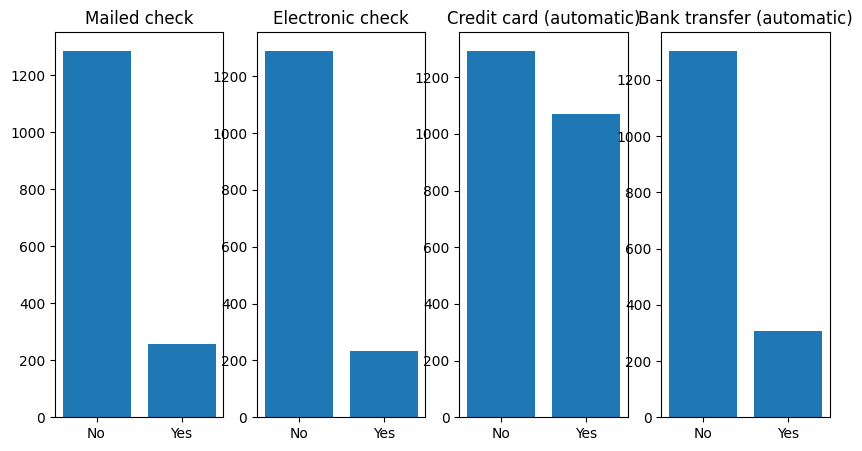

In [61]:
plotar_graficos(df_exp['account_PaymentMethod'])

In [50]:
df_exp.nunique()

,0
customerID,7043
Churn,2
customer_gender,2
customer_SeniorCitizen,2
customer_Partner,2
customer_Dependents,2
customer_tenure,73
phone_PhoneService,2
phone_MultipleLines,3
internet_InternetService,3


internet_InternetService


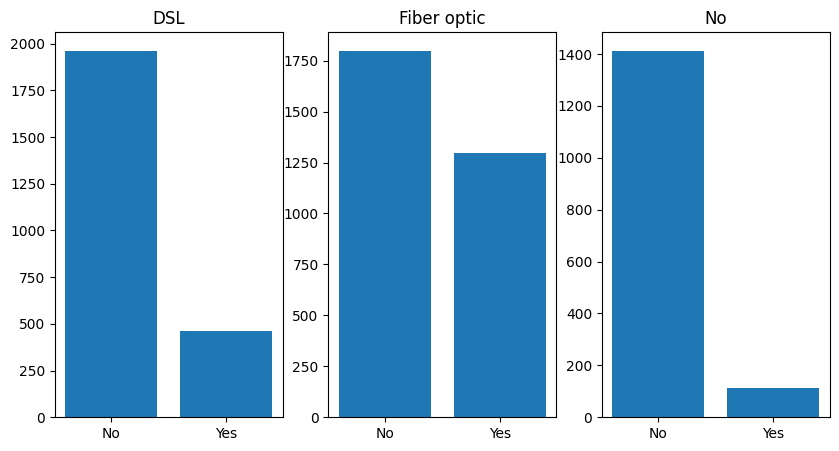

phone_PhoneService


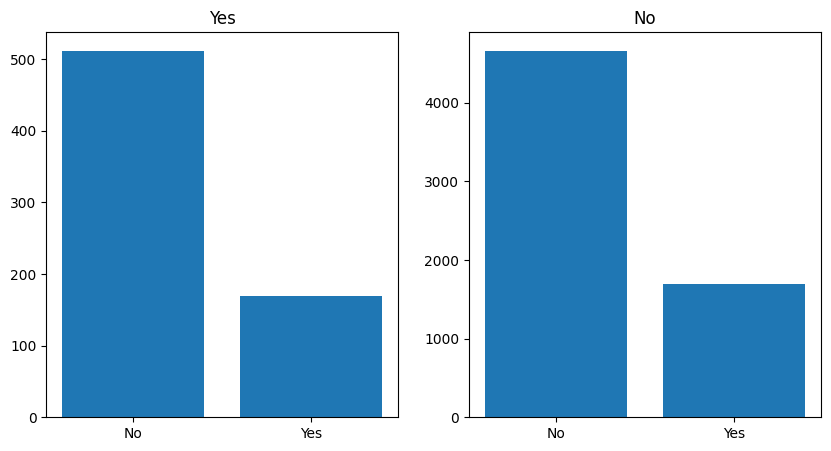

internet_StreamingTV


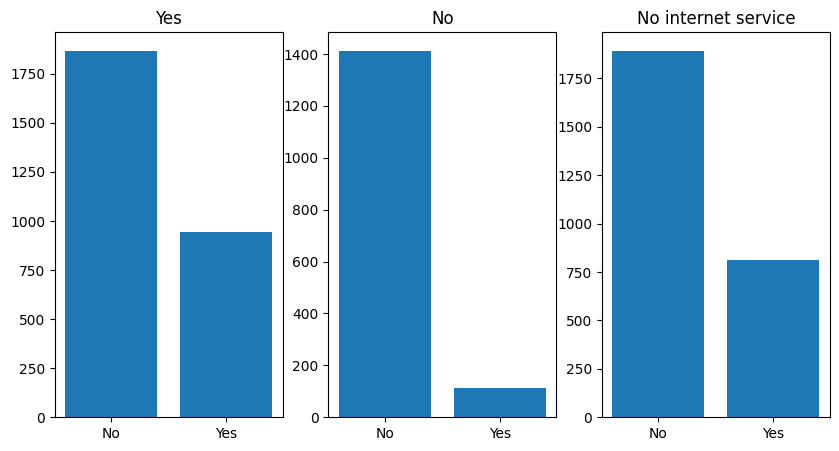

account_PaperlessBilling


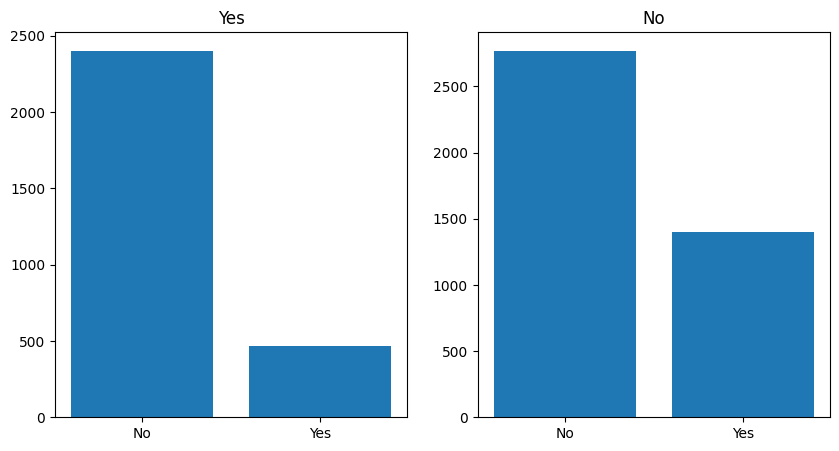

phone_MultipleLines


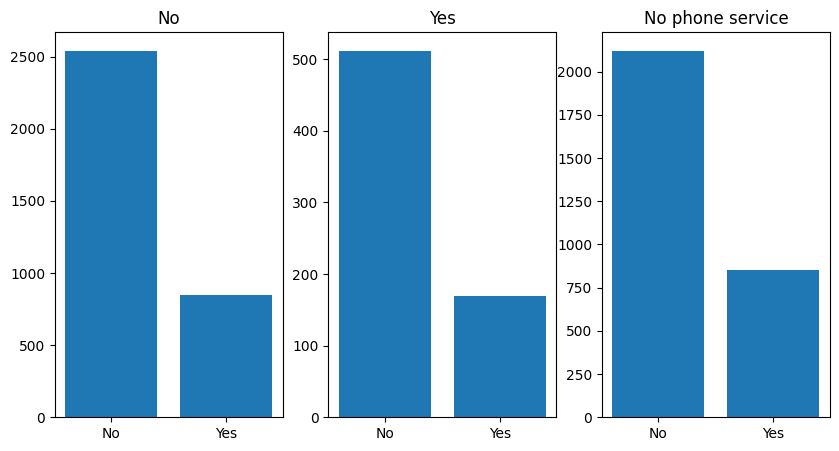

In [62]:
plotar_graficos(df_exp['internet_InternetService'])
plotar_graficos(df_exp['phone_PhoneService'])
plotar_graficos(df_exp['internet_StreamingTV'])
plotar_graficos(df_exp['account_PaperlessBilling'])
plotar_graficos(df_exp['phone_MultipleLines'])


In [66]:
df_numericas = df.select_dtypes(include='number')
df_numericas.corr()

""


In [67]:
df_exp['customer_tenure'].value_counts()

,count
customer_tenure,
1,613
72,362
2,238
3,200
4,176
...,...
28,57
39,56
44,51


In [68]:
df_exp['evadiu'] = df_exp['Churn'] == 'Yes'

In [72]:
df_exp.groupby('Churn')['customer_tenure'].describe()

,count,mean,std,min,25%,50%,75%,max
Churn,,,,,,,,
No,5174.0,37.569965,24.113777,0.0,15.0,38.0,61.0,72.0
Yes,1869.0,17.979133,19.531123,1.0,2.0,10.0,29.0,72.0


In [71]:
df_exp.groupby('Churn')['account_Charges_Total'].describe()

,count,mean,std,min,25%,50%,75%,max
Churn,,,,,,,,
No,5174.0,2549.911442,2329.954215,0.00,572.9,1679.525,4262.85,8672.45
Yes,1869.0,1531.796094,1890.822994,18.85,134.5,703.550,2331.30,8684.80


In [73]:
df_exp.groupby('Churn')['Contas_diarias'].describe()

,count,mean,std,min,25%,50%,75%,max
Churn,,,,,,,,
No,5174.0,2.04208,1.036492,0.61,0.84,2.15,2.95,3.96
Yes,1869.0,2.48145,0.822287,0.63,1.87,2.66,3.14,3.94


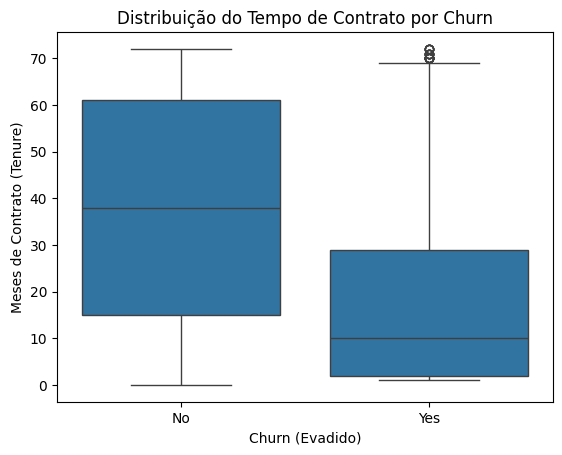

In [75]:

sns.boxplot(x='Churn', y='customer_tenure', data=df_exp)
plt.title('Distribuição do Tempo de Contrato por Churn')
plt.xlabel('Churn (Evadido)')
plt.ylabel('Meses de Contrato (Tenure)')
plt.show()

In [82]:
df_teste = df_exp[['Churn', 'Contas_diarias']]

In [86]:
df_teste['Churn'] = df_teste['Churn'].replace({'Yes': 1, 'No': 0})
df_teste.corr()

/tmp/ipython-input-709007546.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_teste['Churn'] = df_teste['Churn'].replace({'Yes': 1, 'No': 0})


,Churn,Contas_diarias
Churn,1.000000,0.193412
Contas_diarias,0.193412,1.000000


## Conclusões e Insights

A análise dos dados revelou que os clientes com maior propensão à evasão estão concentrados, principalmente, entre aqueles com menor tempo de contrato (novos clientes) e os que optam por planos com pagamento recorrente do tipo **"Month-to-month"**.

Esses dois grupos apresentam uma taxa de churn significativamente maior em comparação aos clientes com contratos anuais ou de longo prazo. Isso sugere que **a flexibilidade do contrato mensal, embora conveniente, pode facilitar o cancelamento** por parte do cliente.

Com base nesses dados, é possível concluir que a ausência de **estratégias de fidelização** voltadas para novos clientes e usuários de contratos mensais pode estar contribuindo diretamente para o aumento da evasão.

------------------------------------------------------------------------------------------------



## 5. Recomendações

Com base nos achados, as seguintes ações são recomendadas para reduzir a evasão:

- **Criar políticas de fidelização voltadas para novos clientes**, como benefícios progressivos à medida que o tempo de contrato aumenta.
- **Incentivar a migração de contratos mensais para anuais ou bienais**, por meio de descontos ou pacotes adicionais.
- **Monitorar clientes nos primeiros meses de uso**, oferecendo suporte proativo e soluções rápidas para possíveis insatisfações.
- **Avaliar métodos de pagamento preferidos pelos clientes que permanecem** e identificar oportunidades de simplificação ou incentivo ao uso desses métodos.

Essas ações podem contribuir para o aumento da satisfação do cliente, fortalecimento da base ativa e redução sustentável da taxa de churn.
